In [108]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
#Dependencies and Setup

%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from pathlib import Path
from itertools import product
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy import stats
from scipy.stats import normaltest

In [2]:
#Create a file path
data_set = Path("../Resources/world_wide_self_harm_and_substance_deaths.csv")

#Read in the data
df = pd.read_csv(data_set)
df.head()


,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
0,2017,Intentional self-harm,0,GBR,Female,0,743552.0,United Kingdom
1,2017,Intentional self-harm,0,GBR,Male,0,782850.0,United Kingdom
2,2017,Intentional self-harm,1,GBR,Female,0,768444.0,United Kingdom
3,2017,Intentional self-harm,1,GBR,Male,0,810126.0,United Kingdom
4,2017,Intentional self-harm,10-14,GBR,Female,16,3640314.0,United Kingdom


In [3]:
df1=df[~(df[df.columns[2:]]==0).any(axis = 1)]
df1

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
4,2017,Intentional self-harm,10-14,GBR,Female,16,3640314.0,United Kingdom
5,2017,Intentional self-harm,10-14,GBR,Male,16,3826458.0,United Kingdom
6,2017,Intentional self-harm,15-19,GBR,Female,104,3605202.0,United Kingdom
7,2017,Intentional self-harm,15-19,GBR,Male,208,3803268.0,United Kingdom
10,2017,Intentional self-harm,20-24,GBR,Female,136,4097544.0,United Kingdom
...,...,...,...,...,...,...,...,...
48621,2017,Mental and behavioural disorders due to psycho...,60-64,VIR,All,1,NaN,Virgin Islands (USA)
48622,2017,Mental and behavioural disorders due to psycho...,65-69,VIR,All,1,NaN,Virgin Islands (USA)
48623,2017,Mental and behavioural disorders due to psycho...,70-74,VIR,All,1,NaN,Virgin Islands (USA)
48625,2017,Mental and behavioural disorders due to psycho...,80-84,VIR,All,1,NaN,Virgin Islands (USA)


In [4]:
df2=df1[~(df1[df1.columns[2:]]=="Unknown").any(axis = 1)]
df2

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
4,2017,Intentional self-harm,10-14,GBR,Female,16,3640314.0,United Kingdom
5,2017,Intentional self-harm,10-14,GBR,Male,16,3826458.0,United Kingdom
6,2017,Intentional self-harm,15-19,GBR,Female,104,3605202.0,United Kingdom
7,2017,Intentional self-harm,15-19,GBR,Male,208,3803268.0,United Kingdom
10,2017,Intentional self-harm,20-24,GBR,Female,136,4097544.0,United Kingdom
...,...,...,...,...,...,...,...,...
48621,2017,Mental and behavioural disorders due to psycho...,60-64,VIR,All,1,NaN,Virgin Islands (USA)
48622,2017,Mental and behavioural disorders due to psycho...,65-69,VIR,All,1,NaN,Virgin Islands (USA)
48623,2017,Mental and behavioural disorders due to psycho...,70-74,VIR,All,1,NaN,Virgin Islands (USA)
48625,2017,Mental and behavioural disorders due to psycho...,80-84,VIR,All,1,NaN,Virgin Islands (USA)


In [5]:
df3=df2[~(df2[df2.columns[2:]]=="All").any(axis = 1)]
df3

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
4,2017,Intentional self-harm,10-14,GBR,Female,16,3.640314e+06,United Kingdom
5,2017,Intentional self-harm,10-14,GBR,Male,16,3.826458e+06,United Kingdom
6,2017,Intentional self-harm,15-19,GBR,Female,104,3.605202e+06,United Kingdom
7,2017,Intentional self-harm,15-19,GBR,Male,208,3.803268e+06,United Kingdom
10,2017,Intentional self-harm,20-24,GBR,Female,136,4.097544e+06,United Kingdom
...,...,...,...,...,...,...,...,...
31935,2021,Mental and behavioural disorders due to psycho...,80-84,AUS,Male,13,2.499620e+05,Australia
31936,2021,Mental and behavioural disorders due to psycho...,85-89,AUS,Male,7,1.357450e+05,Australia
31937,2021,Mental and behavioural disorders due to psycho...,90-94,AUS,Male,4,5.877900e+04,Australia
31938,2021,Mental and behavioural disorders due to psycho...,95+,AUS,Male,2,1.429300e+04,Australia


In [6]:
df4=df3[~(df3[df3.columns[2:3]]=="5-9").any(axis = 1)]
df4

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
4,2017,Intentional self-harm,10-14,GBR,Female,16,3.640314e+06,United Kingdom
5,2017,Intentional self-harm,10-14,GBR,Male,16,3.826458e+06,United Kingdom
6,2017,Intentional self-harm,15-19,GBR,Female,104,3.605202e+06,United Kingdom
7,2017,Intentional self-harm,15-19,GBR,Male,208,3.803268e+06,United Kingdom
10,2017,Intentional self-harm,20-24,GBR,Female,136,4.097544e+06,United Kingdom
...,...,...,...,...,...,...,...,...
31935,2021,Mental and behavioural disorders due to psycho...,80-84,AUS,Male,13,2.499620e+05,Australia
31936,2021,Mental and behavioural disorders due to psycho...,85-89,AUS,Male,7,1.357450e+05,Australia
31937,2021,Mental and behavioural disorders due to psycho...,90-94,AUS,Male,4,5.877900e+04,Australia
31938,2021,Mental and behavioural disorders due to psycho...,95+,AUS,Male,2,1.429300e+04,Australia


In [7]:
# Get all the data for the United States of America 
usa_df = df4.loc[df["Country"] == "United States of America",:]           
                 
usa_df

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
10451,2017,Intentional self-harm,10-14,USA,Female,169,NaN,United States of America
10452,2017,Intentional self-harm,15-19,USA,Female,553,NaN,United States of America
10454,2017,Intentional self-harm,20-24,USA,Female,672,NaN,United States of America
10455,2017,Intentional self-harm,25-29,USA,Female,766,NaN,United States of America
10457,2017,Intentional self-harm,30-34,USA,Female,832,NaN,United States of America
...,...,...,...,...,...,...,...,...
10858,2020,Mental and behavioural disorders due to psycho...,75-79,USA,Male,461,NaN,United States of America
10859,2020,Mental and behavioural disorders due to psycho...,80-84,USA,Male,199,NaN,United States of America
10860,2020,Mental and behavioural disorders due to psycho...,85-89,USA,Male,116,NaN,United States of America
10861,2020,Mental and behavioural disorders due to psycho...,90-94,USA,Male,43,NaN,United States of America


In [8]:
# Get all the data for the Intentional self-harm 
selfharm_df = usa_df.loc[usa_df["Cause"] == "Intentional self-harm", :] 
selfharm_df


,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
10451,2017,Intentional self-harm,10-14,USA,Female,169,NaN,United States of America
10452,2017,Intentional self-harm,15-19,USA,Female,553,NaN,United States of America
10454,2017,Intentional self-harm,20-24,USA,Female,672,NaN,United States of America
10455,2017,Intentional self-harm,25-29,USA,Female,766,NaN,United States of America
10457,2017,Intentional self-harm,30-34,USA,Female,832,NaN,United States of America
...,...,...,...,...,...,...,...,...
10806,2020,Intentional self-harm,75-79,USA,Male,1492,NaN,United States of America
10807,2020,Intentional self-harm,80-84,USA,Male,1153,NaN,United States of America
10808,2020,Intentional self-harm,85-89,USA,Male,778,NaN,United States of America
10809,2020,Intentional self-harm,90-94,USA,Male,389,NaN,United States of America


In [9]:
selfharm_df.count()

Year                      144
Cause                     144
Age_Range                 144
ISO_Code                  144
Sex                       144
Deaths                    144
Age_and_Sex_Population      0
Country                   144
dtype: int64

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of USA for each year.

# Use groupby and summary statistical methods to calculate the following properties of each year: 
# mean, median, variance, standard deviation, and SEM of the country. 
mean = selfharm_df['Deaths'].groupby(selfharm_df['Year']).mean()
median = selfharm_df['Deaths'].groupby(selfharm_df['Year']).var()
var = selfharm_df['Deaths'].groupby(selfharm_df['Year']).var()
std = selfharm_df['Deaths'].groupby(selfharm_df['Year']).std()
sem = selfharm_df['Deaths'].groupby(selfharm_df['Year']).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stat = pd.DataFrame({"Self- Harm Deaths Mean":mean, 
                            "Self-Harm Deaths Median":median, 
                           "Self-Harm Variance":var, 
                           "Self-Harm Std. Dev.":std, 
                           "Self-Harm Std. Err.":sem})

summary_stat



,Self- Harm Deaths Mean,Self-Harm Deaths Median,Self-Harm Variance,Self-Harm Std. Dev.,Self-Harm Std. Err.
Year,,,,,
2017,1308.250000,1.268233e+06,1.268233e+06,1126.158359,187.693060
2018,1341.750000,1.328915e+06,1.328915e+06,1152.785605,192.130934
2019,1318.388889,1.293741e+06,1.293741e+06,1137.427505,189.571251
2020,1275.500000,1.230823e+06,1.230823e+06,1109.424574,184.904096


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  selfharm_df.groupby(['Year'])[['Deaths']].agg(['mean', 'median'])
summary_agg

Deaths       
             mean median
Year                    
2017  1308.250000  876.5
2018  1341.750000  880.0
2019  1318.388889  863.5
2020  1275.500000  805.0

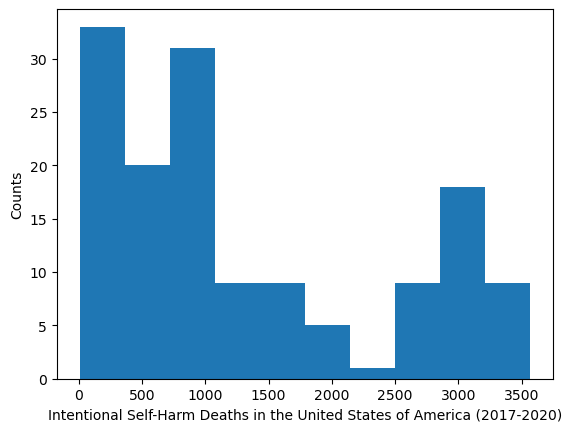

NormaltestResult(statistic=34.51392567404926, pvalue=3.20181522544649e-08)


<Figure size 640x480 with 0 Axes>

In [33]:
intentionaldeaths = selfharm_df['Deaths']
plt.hist(intentionaldeaths)
plt.xlabel('Intentional Self-Harm Deaths in the United States of America (2017-2020)')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(intentionaldeaths.sample(144)))
plt.savefig("output_data/Fig3.png")

In [13]:
#**It fails the normality test because the Pvalue=pvalue= 3.201815225446364e-08 is  very small. 
#iven the complete dataset we can conclude that the data is not normally distributed.


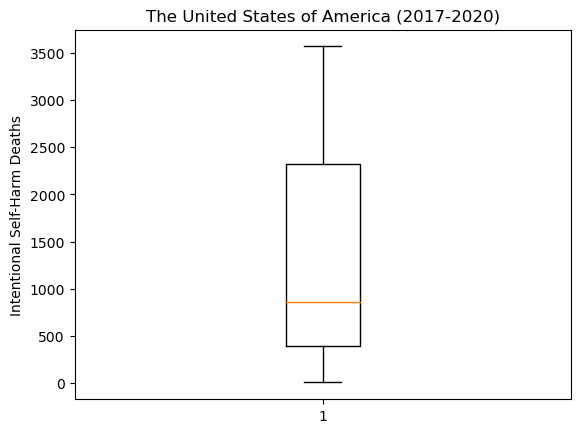

In [14]:
deaths = selfharm_df["Deaths"]
fig1, ax1 = plt.subplots()
ax1.set_title('The United States of America (2017-2020)')
ax1.set_ylabel('Intentional Self-Harm Deaths')
ax1.boxplot(deaths)
plt.show()

In [15]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = deaths.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of deaths is: {lowerq}")
print(f"The upper quartile of deaths is: {upperq}")
print(f"The interquartile range of deaths is: {iqr}")
print(f"The the median of deaths is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of deaths is: 390.75
The upper quartile of deaths is: 2318.25
The interquartile range of deaths is: 1927.5
The the median of deaths is: 863.5 
Values below -2500.5 could be outliers.
Values above 5209.5 could be outliers.


In [16]:
# Generate a scatter plot of intentional self-harm deaths vs age for year 2020
# Extruct columns of interest from original data frame:
year2020_df = selfharm_df.loc[selfharm_df["Year"] == 2020, :] 
year2020_df

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
10763,2020,Intentional self-harm,10-14,USA,Female,204,NaN,United States of America
10764,2020,Intentional self-harm,15-19,USA,Female,526,NaN,United States of America
10766,2020,Intentional self-harm,20-24,USA,Female,676,NaN,United States of America
10767,2020,Intentional self-harm,25-29,USA,Female,786,NaN,United States of America
10769,2020,Intentional self-harm,30-34,USA,Female,785,NaN,United States of America
10770,2020,Intentional self-harm,35-39,USA,Female,824,NaN,United States of America
10772,2020,Intentional self-harm,40-44,USA,Female,766,NaN,United States of America
10773,2020,Intentional self-harm,45-49,USA,Female,843,NaN,United States of America
10775,2020,Intentional self-harm,50-54,USA,Female,891,NaN,United States of America
10776,2020,Intentional self-harm,55-59,USA,Female,896,NaN,United States of America


In [17]:
# Calculate the final intentional self-harm deaths by year
# 2017, 2018, 2019, and 2020
year2017_df = selfharm_df.loc[selfharm_df["Year"] == 2017,:]
year2018_df = selfharm_df.loc[selfharm_df["Year"] == 2018, :]
year2019_df = selfharm_df.loc[selfharm_df["Year"] == 2019, :]
year2020_df = selfharm_df.loc[selfharm_df["Year"] == 2020, :]

year2017_df

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
10451,2017,Intentional self-harm,10-14,USA,Female,169,NaN,United States of America
10452,2017,Intentional self-harm,15-19,USA,Female,553,NaN,United States of America
10454,2017,Intentional self-harm,20-24,USA,Female,672,NaN,United States of America
10455,2017,Intentional self-harm,25-29,USA,Female,766,NaN,United States of America
10457,2017,Intentional self-harm,30-34,USA,Female,832,NaN,United States of America
10458,2017,Intentional self-harm,35-39,USA,Female,833,NaN,United States of America
10460,2017,Intentional self-harm,40-44,USA,Female,904,NaN,United States of America
10461,2017,Intentional self-harm,45-49,USA,Female,1108,NaN,United States of America
10463,2017,Intentional self-harm,50-54,USA,Female,1120,NaN,United States of America
10464,2017,Intentional self-harm,55-59,USA,Female,1091,NaN,United States of America


In [18]:
# Start by getting the last (greatest) deaths for year 2017
year2017_last = year2017_df.groupby('Year').max()['Deaths']
year2017_vol = pd.DataFrame(year2017_last)
# Merge this group df with the original DataFrame to get Age range
year2017_merge = pd.merge(year2017_vol, selfharm_df, on=("Year","Deaths"),how="left")

year2017_merge


,Year,Deaths,Cause,Age_Range,ISO_Code,Sex,Age_and_Sex_Population,Country
0,2017,3324,Intentional self-harm,55-59,USA,Male,NaN,United States of America


In [19]:
# Start by getting the last (greatest) deaths for year 2018
year2018_last = year2018_df.groupby('Year').max()['Deaths']
year2018_vol = pd.DataFrame(year2018_last)
# Merge this group df with the original DataFrame to get Age range
year2018_merge = pd.merge(year2018_vol, selfharm_df, on=("Year","Deaths"),how="left")

year2018_merge

,Year,Deaths,Cause,Age_Range,ISO_Code,Sex,Age_and_Sex_Population,Country
0,2018,3569,Intentional self-harm,55-59,USA,Male,NaN,United States of America


In [20]:
# Start by getting the last (greatest) deaths for year 2019
year2019_last = year2019_df.groupby('Year').max()['Deaths']
year2019_vol = pd.DataFrame(year2019_last)
# Merge this group df with the original DataFrame to get the age range
year2019_merge = pd.merge(year2019_vol, selfharm_df, on=("Year","Deaths"),how="left")

year2019_merge

,Year,Deaths,Cause,Age_Range,ISO_Code,Sex,Age_and_Sex_Population,Country
0,2019,3483,Intentional self-harm,55-59,USA,Male,NaN,United States of America


In [21]:
# Start by getting the last (greatest) deaths for year 2020
year2020_last = year2020_df.groupby('Year').max()['Deaths']
year2020_vol = pd.DataFrame(year2020_last)
# Merge this group df with the original DataFrame to get age range
year2020_merge = pd.merge(year2020_vol, selfharm_df, on=("Year","Deaths"),how="left")

year2020_merge

,Year,Deaths,Cause,Age_Range,ISO_Code,Sex,Age_and_Sex_Population,Country
0,2020,3463,Intentional self-harm,30-34,USA,Male,NaN,United States of America


In [22]:
# Create empty list to fill with year data (for plotting)
# add subset  
year_list = [2017, 2018, 2019, 2020]
years = selfharm_df[selfharm_df["Year"].isin(year_list)]
# Locate the rows which contain deaths on each year and get the numbers of deaths 
# Start by getting the last (greatest) deaths for each year
last_death = years.groupby(["Year", "Age_Range"]).agg(number_deaths=("Deaths", lambda x: x.iloc[-1]))

#Reshape dataframe
last_death = last_death.stack(level=0).unstack(level=0)
# Put years into a list for for loop (and later for plot labels)
yearnum = 0
for year in year_list:
    quartiles = last_death[year].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    iqr = round(upperq-lowerq,2)
# Determine outliers using upper and lower bounds
    lower_bound = round(lowerq - (1.5*iqr),)
    upper_bound = round(upperq + (1.5*iqr),2)

    if yearnum == 0:
           print(f" ")
    print(f"{year}'s potential outliers: {lower_bound}   {upper_bound}")
       
     
    yearnum +=1





 
2017's potential outliers: -1937   6076.12
2018's potential outliers: -1782   5974.5
2019's potential outliers: -1672   5886.25
2020's potential outliers: -1236   5361.5


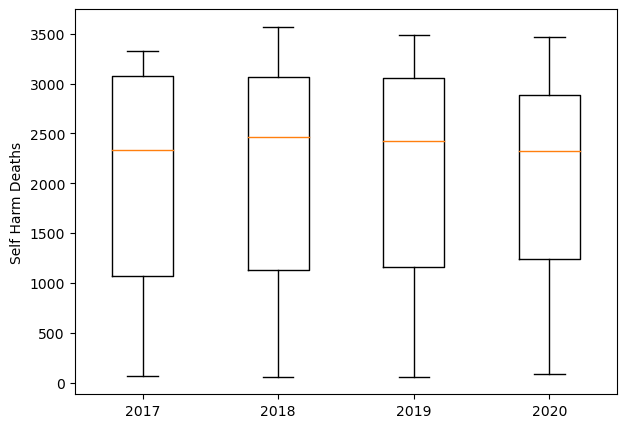

In [23]:
#Reshape dataframe
boxplot_list = []
for years in year_list:
    boxplot_list.append(list(last_death[years]))
    
fig, ax=plt.subplots(1, figsize=(7, 5))
bp=ax.boxplot(boxplot_list)
ax.set_xticks([1,2,3,4], year_list)
ax.set_ylabel("Self Harm Deaths")
for flier in bp['fliers']:
    flier.set(marker='o', markersize=10, markerfacecolor='crimson', alpha=1)

plt.show()  



In [24]:
Female = year2020_df.loc[year2020_df["Sex"] == 'Female', :] 
Male = year2020_df.loc[year2020_df["Sex"]=='Male', :]

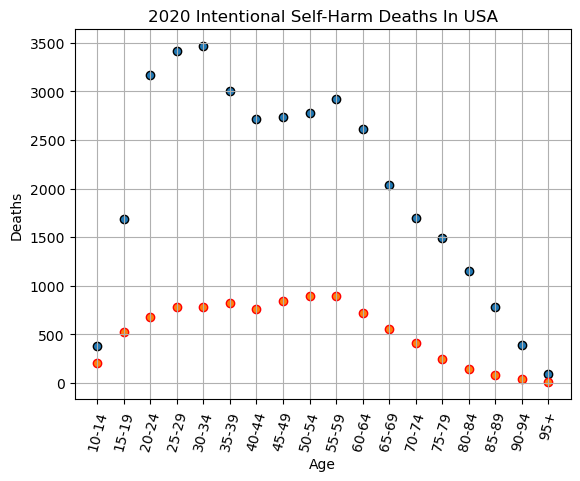

In [25]:
# Build scatter plot for deaths vs. age for 2020

plt.scatter(Male['Age_Range'],Male['Deaths'], marker='o', edgecolor='black', label="Male")

plt.scatter(Female['Age_Range'],Female['Deaths'], marker='o', edgecolor='red', label='Female')

#plt.legend(handles=[male, female], loc="best")
##plt.scatter(year2020_df['Age_Range'],year2020_df['Deaths'], marker='o', edgecolor='black')

# Incorporate the other graph properties

plt.xticks(rotation=75)
plt.xlabel('Age')
plt.ylabel('Deaths')
plt.title('2020 Intentional Self-Harm Deaths In USA')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")


plt.show()

In [26]:
# Define a function to create Linear Regression plots

def linear_reg(x_axis, y_axis,eq_loc):  
    correlation = st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit = p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{ p_int: .2f}"
       
    #Plot the line
    plt.scatter(x_axis, y_axis ,marker="o")
    plt.plot(x_axis,p_fit,"--", color='red')
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0],2)}")

In [27]:
# Display 2020 data
year2020_df.head()

,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country
10763,2020,Intentional self-harm,10-14,USA,Female,204,NaN,United States of America
10764,2020,Intentional self-harm,15-19,USA,Female,526,NaN,United States of America
10766,2020,Intentional self-harm,20-24,USA,Female,676,NaN,United States of America
10767,2020,Intentional self-harm,25-29,USA,Female,786,NaN,United States of America
10769,2020,Intentional self-harm,30-34,USA,Female,785,NaN,United States of America


In [28]:
# get valuest from Age range
 
year2020_df["newagerange"]=year2020_df['Age_Range'].str[:2]   
  
year2020_df


C:\Users\adria\AppData\Local\Temp\ipykernel_19244\784015250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2020_df["newagerange"]=year2020_df['Age_Range'].str[:2]


,Year,Cause,Age_Range,ISO_Code,Sex,Deaths,Age_and_Sex_Population,Country,newagerange
10763,2020,Intentional self-harm,10-14,USA,Female,204,NaN,United States of America,10
10764,2020,Intentional self-harm,15-19,USA,Female,526,NaN,United States of America,15
10766,2020,Intentional self-harm,20-24,USA,Female,676,NaN,United States of America,20
10767,2020,Intentional self-harm,25-29,USA,Female,786,NaN,United States of America,25
10769,2020,Intentional self-harm,30-34,USA,Female,785,NaN,United States of America,30
10770,2020,Intentional self-harm,35-39,USA,Female,824,NaN,United States of America,35
10772,2020,Intentional self-harm,40-44,USA,Female,766,NaN,United States of America,40
10773,2020,Intentional self-harm,45-49,USA,Female,843,NaN,United States of America,45
10775,2020,Intentional self-harm,50-54,USA,Female,891,NaN,United States of America,50
10776,2020,Intentional self-harm,55-59,USA,Female,896,NaN,United States of America,55


In [29]:
# Calculate the Pearson correlation coefficient between deaths age 
# for age and average deaths for the year 2020
#age=year2020_df.iloc[:,1]
#deaths=year2020_df.iloc[:,2]
#correlation = st.pearsonr(age,deaths)
#print(f"The correlation between age and the average deaths is {round(correlation[0],2)}")

In [30]:
# Convert relevant date columns to float

year2020_df = year2020_df.astype({"newagerange": "float"})
year2020_df.dtypes

Year                        int64
Cause                      object
Age_Range                  object
ISO_Code                   object
Sex                        object
Deaths                      int64
Age_and_Sex_Population    float64
Country                    object
newagerange               float64
dtype: object

The r-value between newagerange and Deaths is -0.36


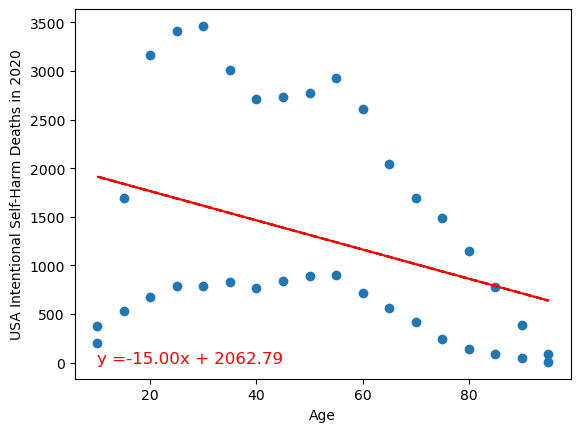

In [34]:
# Linear regression on year 2020
linear_reg(year2020_df['newagerange'], year2020_df['Deaths'],(10, -10))
plt.xlabel('Age')
plt.ylabel('USA Intentional Self-Harm Deaths in 2020')
# Save the figure
plt.savefig("output_data/Fig2.png")

In [32]:
#Discussion about the linear relationship:  In the year 2020 Intentinal harm-self deaths have a none or very weak strength of correlation 
#negative  coorelation -0.36  that is to  say the deaths level does not much relate to the Age range. 

In [3]:
gun_violence_data = Path("../Resources/gun_violence_us (1).csv")
gun_violence_df = pd.read_csv(gun_violence_data)
gun_violence_df.head()

,state,mortality_rate,ownership_rate
0,AL,16.7,0.489
1,AK,18.8,0.617
2,AZ,13.4,0.323
3,AR,16.4,0.579
4,CA,7.4,0.201


In [4]:
gun_violence_df.columns

Index(['state', 'mortality_rate', 'ownership_rate'], dtype='object')

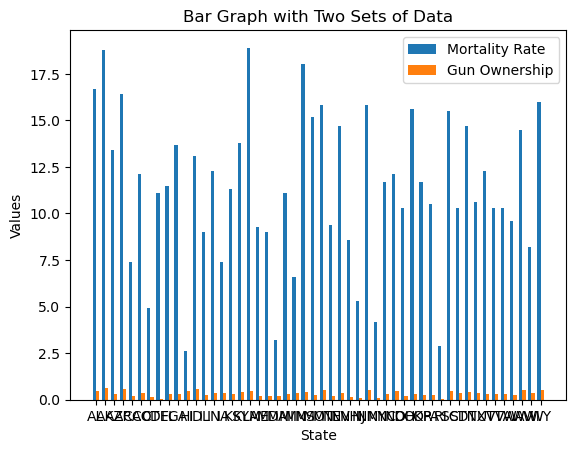

In [5]:
data = {'State': gun_violence_df['state'],
        'Mortality Rate': gun_violence_df['mortality_rate'],
        'Gun Ownership': gun_violence_df['ownership_rate']}
df = pd.DataFrame(data)

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
bar_positions1 = range(len(df))
bar_positions2 = [x + bar_width for x in bar_positions1]

# Create the bar graph
plt.bar(bar_positions1, df['Mortality Rate'], width=bar_width, label='Mortality Rate')
plt.bar(bar_positions2, df['Gun Ownership'], width=bar_width, label='Gun Ownership')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Values')
plt.title('Bar Graph with Two Sets of Data')
plt.xticks([x + bar_width/2 for x in bar_positions1], df['State'])

# Add legend
plt.legend()

# Show the plot

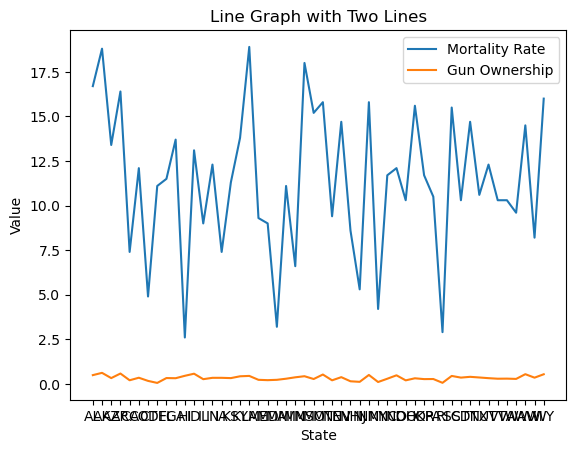

In [6]:
data = {'State': gun_violence_df['state'],
        'Mortality Rate': gun_violence_df['mortality_rate'],
        'Gun Ownership': gun_violence_df['ownership_rate']}
df = pd.DataFrame(data)

# Plot the lines
plt.plot(df['State'], df['Mortality Rate'], label='Mortality Rate')
plt.plot(df['State'], df['Gun Ownership'], label='Gun Ownership')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Value')
plt.title('Line Graph with Two Lines')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [7]:
mortality_rate_average = gun_violence_df['mortality_rate'].mean()
print(mortality_rate_average)

11.354000000000001


In [8]:
ownership_rate_average = gun_violence_df['ownership_rate'].mean()
print(ownership_rate_average)

0.33092000000000005


In [110]:
firearm_death_data = Path("../Resources/Firearm_suicide_homicide_dataset.csv")
firearm_death_df = pd.read_csv(firearm_death_data)
firearm_death_df.tail()

,year,state,division,total_population,fss,homicide_rate,firearm_homicide_rate,nonfirearm_homicide_rate,firearm_suicides,total_suicides,firearm_homicides,nonfirearm_homicides,total_homicides,white_fss,nonwhite_fss,nextyearfss,nextyearnonwhitefss,nextyearwhitefss
3646,2020,Virginia,South Atlantic,8590563.0,0.580350,6.181201395,5.121899461,1.059301934,697,1201,440.0,91.0,531,0.594540,0.514151,NaN,NaN,NaN
3647,2020,Washington,Pacific,7693612.0,0.509901,4.185290342,2.742534976,1.442755366,618,1212,211.0,111.0,322,0.531191,0.363636,NaN,NaN,NaN
3648,2020,West Virginia,South Atlantic,1784787.0,0.621469,6.387316806,4.874531247,1.512785559,220,354,87.0,27.0,114,0.626113,0.529412,NaN,NaN,NaN
3649,2020,Wisconsin,East North Central,5832655.0,0.510393,5.726380182,4.337647264,1.388732918,442,866,253.0,81.0,334,0.516169,0.435484,NaN,NaN,NaN
3650,2020,Wyoming,Mountain,582328.0,0.703297,4.29311316,3.091041475,1.202071685,128,182,18.0,7.0,25,0.706215,0.600000,NaN,NaN,NaN


In [111]:
#years_firearm_death_df = firearm_death_df.sort_values("year", ascending=False)
#years_firearm_death_df.head()


In [112]:
firearm_death_df.columns

Index(['year', 'state', 'division', 'total_population', 'fss', 'homicide_rate',
       'firearm_homicide_rate', 'nonfirearm_homicide_rate', 'firearm_suicides',
       'total_suicides', 'firearm_homicides', 'nonfirearm_homicides',
       'total_homicides', 'white_fss', 'nonwhite_fss', 'nextyearfss',
       'nextyearnonwhitefss', 'nextyearwhitefss'],
      dtype='object')

In [113]:
firearm_death_df = firearm_death_df[['year', 'state', 'division', 'total_population', 'fss', 'homicide_rate',
       'firearm_homicide_rate', 'nonfirearm_homicide_rate', 'firearm_suicides',
       'total_suicides', 'firearm_homicides', 'nonfirearm_homicides',
       'total_homicides', 'white_fss', 'nonwhite_fss']]
firearm_death_df

,year,state,division,total_population,fss,homicide_rate,firearm_homicide_rate,nonfirearm_homicide_rate,firearm_suicides,total_suicides,firearm_homicides,nonfirearm_homicides,total_homicides,white_fss,nonwhite_fss
0,1949,Alabama,East South Central,3004000.0,0.717949,14.28095872,7.822902796,6.458055925,140,195,235.0,194.0,429,0.708571,0.482655
1,1949,Arizona,Mountain,726000.0,0.575000,5.64738292,3.168044077,2.479338843,46,80,23.0,18.0,41,0.583333,0.800000
2,1949,Arkansas,West South Central,1835000.0,0.671053,7.901907357,4.141689373,3.760217984,102,152,76.0,69.0,145,0.664336,0.500000
3,1949,California,Pacific,10499000.0,0.382623,4.61948757,1.857319745,2.762167826,709,1853,195.0,290.0,485,0.382187,0.777778
4,1949,Colorado,Mountain,1249000.0,0.551570,5.044035228,3.442754203,1.601281025,123,223,43.0,20.0,63,0.559633,0.392405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,2020,Virginia,South Atlantic,8590563.0,0.580350,6.181201395,5.121899461,1.059301934,697,1201,440.0,91.0,531,0.594540,0.514151
3647,2020,Washington,Pacific,7693612.0,0.509901,4.185290342,2.742534976,1.442755366,618,1212,211.0,111.0,322,0.531191,0.363636
3648,2020,West Virginia,South Atlantic,1784787.0,0.621469,6.387316806,4.874531247,1.512785559,220,354,87.0,27.0,114,0.626113,0.529412
3649,2020,Wisconsin,East North Central,5832655.0,0.510393,5.726380182,4.337647264,1.388732918,442,866,253.0,81.0,334,0.516169,0.435484


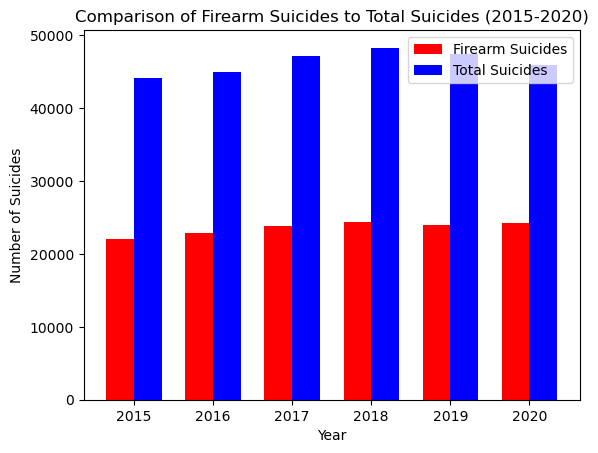

In [114]:
# Load your dataset into a pandas DataFrame
#firearm_death_df = pd.read_csv(firearm_death_data)

# Filter the dataset for years 2015 to 2020
filtered_data = firearm_death_df[(firearm_death_df['year'] >= 2015) & (firearm_death_df['year'] <= 2020)]

# Group the filtered data by year and calculate the sum of firearm suicides and total suicides
grouped_data = filtered_data.groupby('year').agg({'firearm_suicides': 'sum', 'total_suicides': 'sum'}).reset_index()

# Create a side-by-side bar graph
labels = grouped_data['year']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, grouped_data['firearm_suicides'], width, label='Firearm Suicides', color='red')
bar2 = ax.bar(x + width/2, grouped_data['total_suicides'], width, label='Total Suicides', color='blue')

ax.set_xlabel('Year')
ax.set_ylabel('Number of Suicides')
ax.set_title('Comparison of Firearm Suicides to Total Suicides (2015-2020)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

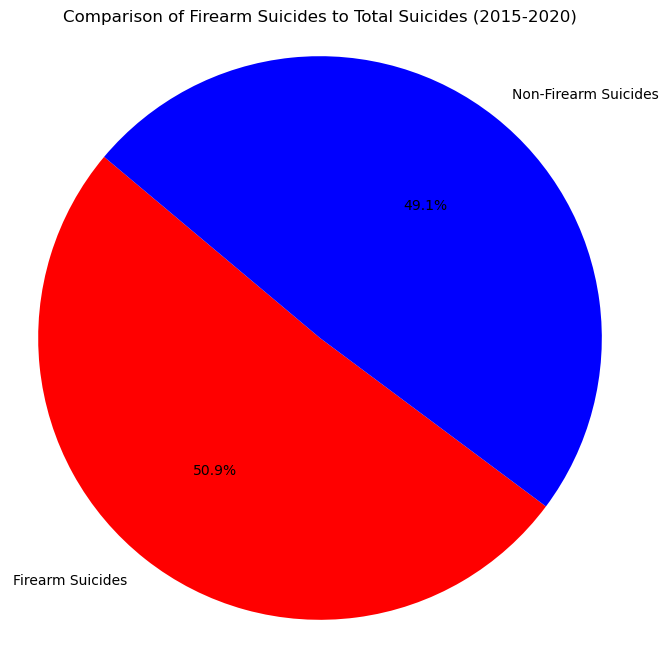

In [115]:
#firearm_death_df = pd.read_csv(firearm_death_data)

# Filter the dataset for years 2015 to 2020
#filtered_data = firearm_death_df[(firearm_death_df['year'] >= 2015) & (firearm_death_df['year'] <= 2020)]

# Calculate the total firearm suicides and total suicides for the filtered years
total_firearm_suicides = filtered_data['firearm_suicides'].sum()
total_suicides = filtered_data['total_suicides'].sum()

# Create a pie chart
labels = ['Firearm Suicides', 'Non-Firearm Suicides']
sizes = [total_firearm_suicides, total_suicides - total_firearm_suicides]
colors = ['red', 'blue']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Comparison of Firearm Suicides to Total Suicides (2015-2020)')
plt.show()

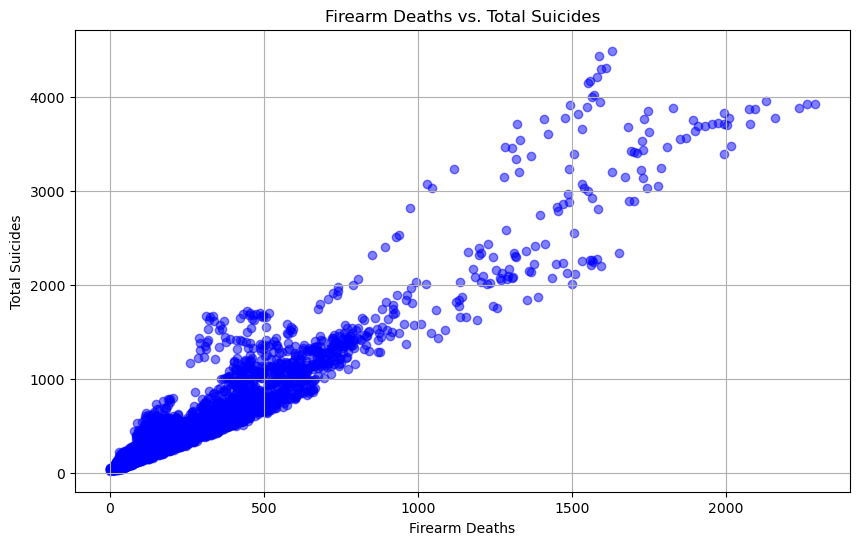

In [116]:
firearm_deaths = firearm_death_df['firearm_suicides']
total_suicides = firearm_death_df['total_suicides']

plt.figure(figsize=(10, 6))
plt.scatter(firearm_deaths, total_suicides, color='blue', alpha=0.5)
plt.title('Firearm Deaths vs. Total Suicides')
plt.xlabel('Firearm Deaths')
plt.ylabel('Total Suicides')
plt.grid(True)
plt.show()

In [117]:
correlation_coefficient, p_value = pearsonr(firearm_deaths, total_suicides)
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.952390378750439
P-value: 0.0


<Axes: title={'center': 'firearm_suicides'}, xlabel='year'>

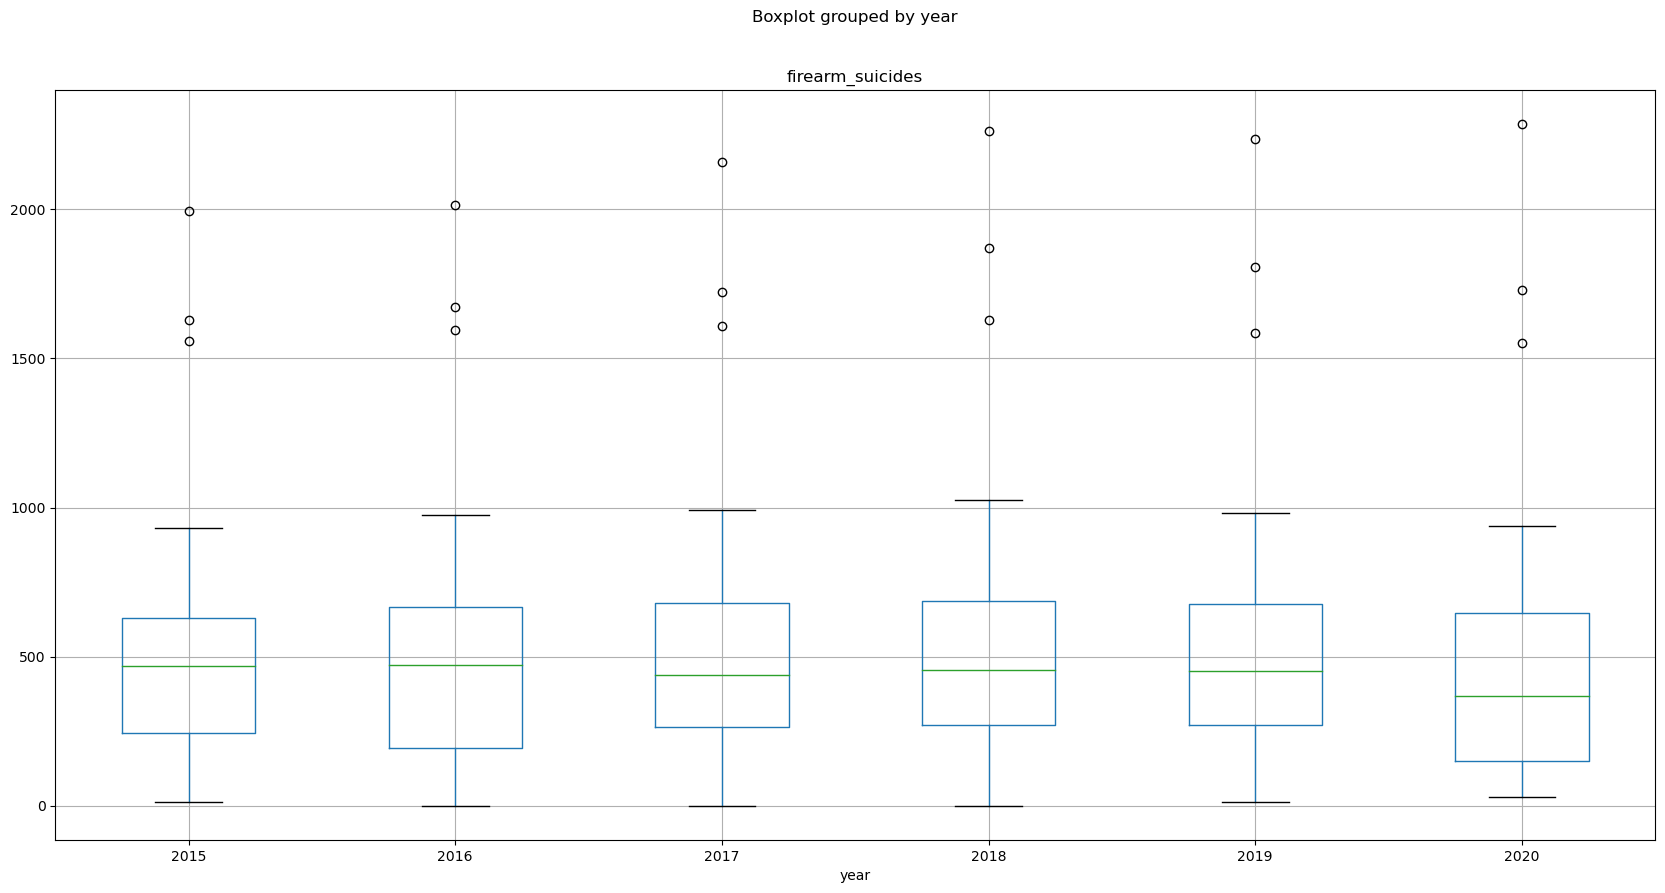

In [118]:
# Create a boxplot to compare means
#filtered_data.replace(0, pd.NA, inplace=True)
filtered_data2 = filtered_data.dropna() 
filtered_data2.boxplot("firearm_suicides", by="year", figsize=(20, 10))

In [119]:
 # Extract individual groups
group0 = filtered_data2[filtered_data2["year"] == 2015]["firearm_suicides"]
group1 = filtered_data2[filtered_data2["year"] == 2016]["firearm_suicides"]
group2 = filtered_data2[filtered_data2["year"] == 2017]["firearm_suicides"]
group3 = filtered_data2[filtered_data2["year"] == 2018]["firearm_suicides"]
group4 = filtered_data2[filtered_data2["year"] == 2019]["firearm_suicides"]
group5 = filtered_data2[filtered_data2["year"] == 2020]["firearm_suicides"]

In [120]:
 # Perform the ANOVA
stats.f_oneway(group0, group1, group2, group3, group4, group5)

F_onewayResult(statistic=0.1549235600888832, pvalue=0.978414786675637)

In [122]:
states= Path("../Resources/states.csv")
states_df = pd.read_csv(states)
states_df

,State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,District of Columbia,DC
9,Florida,FL


In [123]:
states_df = states_df.rename(columns={"State": "state"})

In [124]:
mergedstates_df =firearm_death_df.merge(states_df, on ='state')
mergedstates_df

,year,state,division,total_population,fss,homicide_rate,firearm_homicide_rate,nonfirearm_homicide_rate,firearm_suicides,total_suicides,firearm_homicides,nonfirearm_homicides,total_homicides,white_fss,nonwhite_fss,Abbreviation
0,1949,Alabama,East South Central,3004000.0,0.717949,14.28095872,7.822902796,6.458055925,140,195,235.0,194.0,429,0.708571,0.482655,AL
1,1950,Alabama,East South Central,3061743.0,0.688995,14.10961011,8.165283631,5.944326483,144,209,250.0,182.0,432,0.672131,0.807692,AL
2,1951,Alabama,East South Central,3082242.7,0.710383,11.48514359,6.359006058,5.126137536,130,183,196.0,158.0,354,0.737805,0.473684,AL
3,1952,Alabama,East South Central,3102742.4,0.728643,13.05296888,7.058272063,5.99469682,145,199,219.0,186.0,405,0.732558,0.703704,AL
4,1953,Alabama,East South Central,3123242.1,0.694690,12.03877215,6.403602206,5.635169941,157,226,200.0,176.0,376,0.686567,0.703704,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3646,2016,Hawaii,Pacific,1428557.0,0.212644,2.730027573,1.540015554,1.190012019,37,174,22.0,17.0,39,0.178571,0.180180,HI
3647,2017,Hawaii,Pacific,1427538.0,0.132159,2.451773613,0.280202699,2.171570914,30,227,4.0,31.0,35,0.135135,0.090090,HI
3648,2018,Hawaii,Pacific,1420491.0,0.170455,2.815927732,1.407963866,1.407963866,30,176,20.0,20.0,40,0.225352,0.099010,HI
3649,2019,Hawaii,Pacific,1415872.0,0.183036,2.471974868,0.988789947,1.483184921,41,224,14.0,21.0,35,0.182796,0.157480,HI


In [125]:
average_firearmdeath = mergedstates_df.groupby("Abbreviation")['firearm_suicides'].mean()
avg_firearmdeath_df = pd.DataFrame(average_firearmdeath)
avg_firearmdeath_df = avg_firearmdeath_df.reset_index()
avg_firearmdeath_df

,Abbreviation,firearm_suicides
0,AK,66.016129
1,AL,339.458333
2,AR,206.652778
3,AZ,370.972222
4,CA,1468.041667
5,CO,305.180556
6,CT,98.666667
7,DC,17.458333
8,DE,35.763889
9,FL,952.430556


In [126]:
stateabrv_df = gun_violence_df.rename(columns={"state": "Abbreviation"})

In [127]:
gun_violence_df

,state,mortality_rate,ownership_rate
0,AL,16.7,0.489
1,AK,18.8,0.617
2,AZ,13.4,0.323
3,AR,16.4,0.579
4,CA,7.4,0.201
5,CO,12.1,0.343
6,CT,4.9,0.166
7,DE,11.1,0.052
8,FL,11.5,0.325
9,GA,13.7,0.316


In [128]:
merged_df = stateabrv_df.merge(avg_firearmdeath_df, on='Abbreviation')

In [129]:
merged_df

,Abbreviation,mortality_rate,ownership_rate,firearm_suicides
0,AL,16.7,0.489,339.458333
1,AK,18.8,0.617,66.016129
2,AZ,13.4,0.323,370.972222
3,AR,16.4,0.579,206.652778
4,CA,7.4,0.201,1468.041667
5,CO,12.1,0.343,305.180556
6,CT,4.9,0.166,98.666667
7,DE,11.1,0.052,35.763889
8,FL,11.5,0.325,952.430556
9,GA,13.7,0.316,535.222222


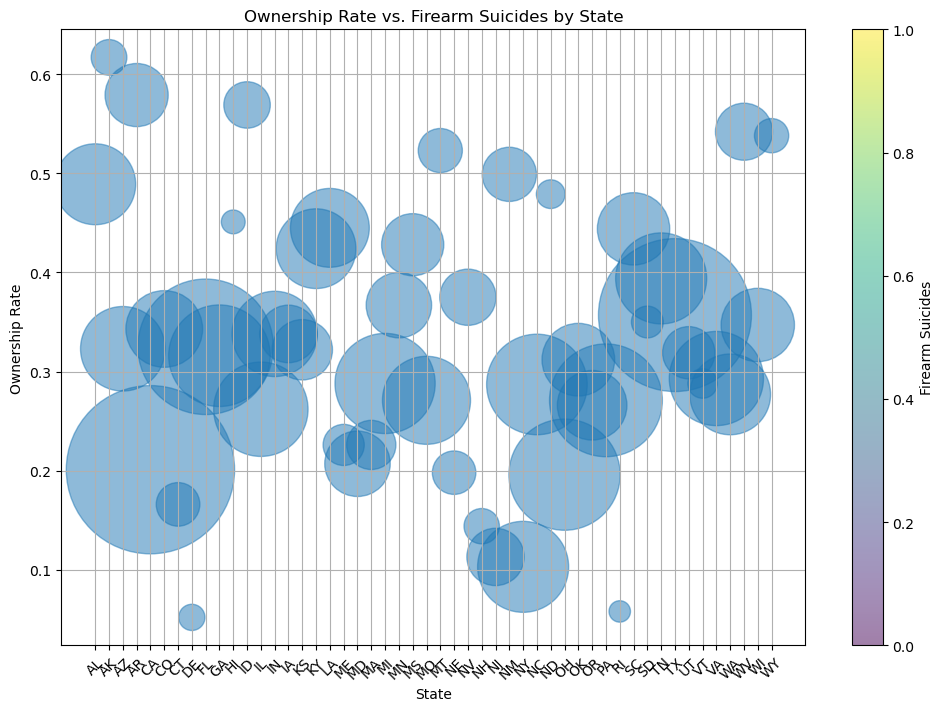

In [130]:
plt.figure(figsize=(12, 8))
plt.scatter(merged_df['Abbreviation'], merged_df['ownership_rate'], s=merged_df['firearm_suicides']*10, alpha=0.5)
plt.title('Ownership Rate vs. Firearm Suicides by State')
plt.xlabel('State')
plt.ylabel('Ownership Rate')
plt.colorbar(label='Firearm Suicides')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [131]:
#plt.figure(figsize=(12, 8))

# Define the width of each bar
#bar_width = 0.35

# Get the states, ownership rate, and firearm suicides data
#states = merged_df['abbreviation']
#ownership_rate = merged_df['ownership_rate']
#firearm_suicides = merged_df['firearm_suicides']

# Plot the grouped bar chart
#plt.bar(states, ownership_rate, width=bar_width, label='Ownership Rate')
#plt.bar(states, firearm_suicides, width=bar_width, label='Firearm Suicides', alpha=0.5)

#plt.xlabel('State')
#plt.ylabel('Rate')
#plt.title('Ownership Rate vs. Firearm Suicides by State')
#plt.xticks(rotation=45)
#plt.legend()
#plt.grid(axis='y')
#plt.tight_layout()
#plt.show()

In [132]:
wrk = Path("../Resources/average_hours_worked_per_week.csv")
House_hold = Path("../Resources/Household.income 2.csv")
suicide = Path("../Resources/2015_suicide_rates.csv")
sal = Path("../Resources/data-tableusa.csv")
salperstate = Path("../Resources/h08.csv")

wrk_df = pd.read_csv(wrk, encoding="UTF-8")
House_hold_df = pd.read_csv(House_hold, encoding="UTF-8")
suicide_df = pd.read_csv(suicide, encoding="UTF-8")
#wrk_df.head()
House_hold_df.head()
#Annual_hours_df.head()
salarybyamount_df = pd.read_csv(sal, encoding="UTF-8")
salarybystate_df = pd.read_csv(salperstate, encoding="UTF-8")
salarybyamount_df.head()#actually suicide deaths per year


,YEAR,STATE,RATE,DEATHS,URL
0,2021,AL,15.8,827,/nchs/pressroom/states/alabama/al.htm
1,2021,AK,30.8,220,/nchs/pressroom/states/alaska/ak.htm
2,2021,AZ,19.5,1475,/nchs/pressroom/states/arizona/az.htm
3,2021,AR,20.6,618,/nchs/pressroom/states/arkansas/ar.htm
4,2021,CA,10.1,4148,/nchs/pressroom/states/california/ca.htm


In [133]:

# Selecting specific columns "Country", "Time", and "Value"
clean_wrk_df = wrk_df.iloc[11:16] 
clean_house_hold_df = House_hold_df[["State","2020 (41)","2019","2018","2017","2016"]]
columns = "State","2020","2019","2018","2017","2016"
clean_house_hold_df.columns = columns

clean_house_hold_df = clean_house_hold_df.drop(clean_house_hold_df.index[0])
clean_house_hold_df = clean_house_hold_df.drop(clean_house_hold_df.index[0])
clean_house_hold_df = clean_house_hold_df.set_index(clean_house_hold_df.columns[0])
clean_house_hold_df[["2020","2019","2018","2017","2016"]] = clean_house_hold_df[["2020","2019","2018","2017","2016"]].astype(float)
column = [["2020","2019","2018","2017","2016"]]

clean_house_hold_df.head()

#clean_house_hold_df = clean_house_hold_df.set_index(clean_house_hold_df.columns[0])
# Displaying the new DataFrame
clean_wrk_df.tail()
clean_house_hold_df.head()


,2020,2019,2018,2017,2016
State,,,,,
Alabama,54690.0,56200.0,49940.0,51110.0,47220.0
Alaska,74750.0,78390.0,68730.0,72230.0,75720.0
Arizona,67090.0,70670.0,62280.0,61130.0,57100.0
Arkansas,50780.0,54540.0,49780.0,48830.0,45910.0
California,77650.0,78110.0,70490.0,69760.0,66640.0


In [134]:
print(clean_wrk_df.columns)


Index(['U.S. average hours worked per week 2007-2022', 'Unnamed: 1'], dtype='object')


In [135]:

clean_wrk_df.columns = ["Year", "Average Weekly Worked Hours"]
clean_wrk_df = clean_wrk_df.reset_index()

clean_wrk_df


,index,Year,Average Weekly Worked Hours
0,11,2016,34.4
1,12,2017,34.4
2,13,2018,34.5
3,14,2019,34.4
4,15,2020,34.6


In [136]:
# Assuming 'column' is a 1D array or list containing the years
avg_hrs_wrk = pd.DataFrame({
    "Year": ["2016","2017", "2018", "2019", "2020"],
    "Average Household Income ($)": clean_wrk_df["Average Weekly Worked Hours"]
})


In [137]:
average_income_16 = float("{:.2f}".format(clean_house_hold_df['2016'].mean()))
average_income_20 = float("{:.2f}".format(clean_house_hold_df['2020'].mean()))
average_income_19 = float("{:.2f}".format(clean_house_hold_df['2019'].mean()))
average_income_18 = float("{:.2f}".format(clean_house_hold_df['2018'].mean()))
average_income_17 = float("{:.2f}".format(clean_house_hold_df['2017'].mean()))


In [138]:
print(type(average_income_16))
print(type(average_income_20))
print(type(average_income_19))
print(type(average_income_18))
print(type(average_income_17))


<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


In [139]:
us_average_income = pd.DataFrame({
    "Year": ["2016","2017", "2018", "2019", "2020"],
    "Average Household Income ($)": [average_income_16, average_income_17, average_income_18, average_income_19, average_income_20]
})

In [140]:
us_average_income

,Year,Average Household Income ($)
0,2016,59179.61
1,2017,61640.59
2,2018,64411.18
3,2019,69720.59
4,2020,68660.39


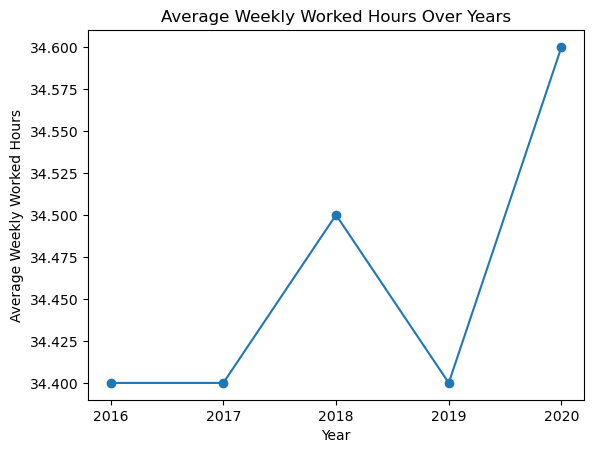

In [141]:
# Assuming clean_wrk_df['Year'] and clean_wrk_df['Average Weekly Worked Hours'] are DataFrame columns
# Convert the numpy array to a list
year_list = clean_wrk_df['Year']

# Plot the data
plt.plot(avg_hrs_wrk["Year"], avg_hrs_wrk["Average Household Income ($)"], marker='o', linestyle='-')

# Set y-axis limits and ticks


# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Weekly Worked Hours')
plt.title('Average Weekly Worked Hours Over Years')
plt.savefig('../Visuals/average_weekly_hours_worked.png')
# Show the plot
plt.show()

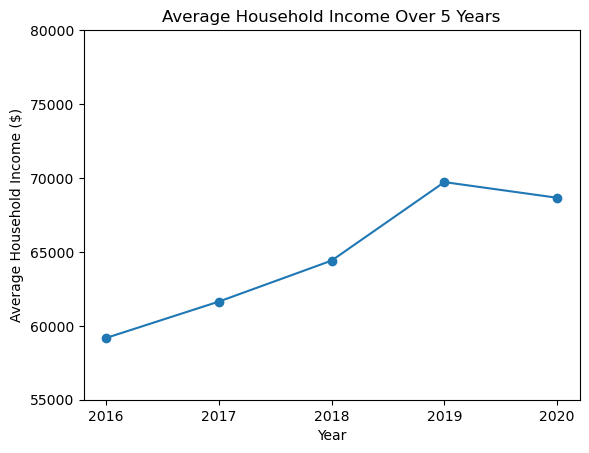

In [142]:
# Plot the data
plt.plot(us_average_income['Year'], us_average_income['Average Household Income ($)'], marker='o', linestyle='-')

# Set y-axis limits and ticks
plt.ylim(55000, 80000)
plt.yticks(range(55000, 80001, 5000))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Household Income ($)')
plt.title('Average Household Income Over 5 Years')
plt.savefig('../Visuals/average_household_income.png')
# Show the plot
plt.show()

In [143]:
print(suicide_df.columns)
suicide_df



Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value', 'Flag Codes'],
      dtype='object')


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,SUICIDE,TOT,100000PER,A,2015,13.2,NaN
1,AUS,SUICIDE,TOT,100000PER,A,2016,12.2,NaN
2,AUS,SUICIDE,TOT,100000PER,A,2017,13.6,NaN
3,AUS,SUICIDE,TOT,100000PER,A,2018,13.0,NaN
4,AUS,SUICIDE,TOT,100000PER,A,2019,13.5,NaN
...,...,...,...,...,...,...,...,...
232,ROU,SUICIDE,TOT,100000PER,A,2015,10.9,NaN
233,ROU,SUICIDE,TOT,100000PER,A,2016,9.6,NaN
234,ROU,SUICIDE,TOT,100000PER,A,2017,9.4,NaN
235,ROU,SUICIDE,TOT,100000PER,A,2018,9.5,NaN


In [144]:
suicide_df = suicide_df[["LOCATION", "INDICATOR", "SUBJECT", "MEASURE", "TIME", "Value"]]
suicide_df.columns = ["Country","Indicator", "Subject","Measure", "Year", "Value"]
suicide_df.head()

,Country,Indicator,Subject,Measure,Year,Value
0,AUS,SUICIDE,TOT,100000PER,2015,13.2
1,AUS,SUICIDE,TOT,100000PER,2016,12.2
2,AUS,SUICIDE,TOT,100000PER,2017,13.6
3,AUS,SUICIDE,TOT,100000PER,2018,13.0
4,AUS,SUICIDE,TOT,100000PER,2019,13.5


In [145]:
usa_suicide_rates = suicide_df[suicide_df["Country"] == "USA"]
usa_suicide_rates.reset_index(drop=True, inplace=True)

usa_suicide_rates.head()

,Country,Indicator,Subject,Measure,Year,Value
0,USA,SUICIDE,TOT,100000PER,2015,14.0
1,USA,SUICIDE,TOT,100000PER,2016,14.2
2,USA,SUICIDE,TOT,100000PER,2017,14.8
3,USA,SUICIDE,TOT,100000PER,2018,15.0
4,USA,SUICIDE,TOT,100000PER,2019,14.7


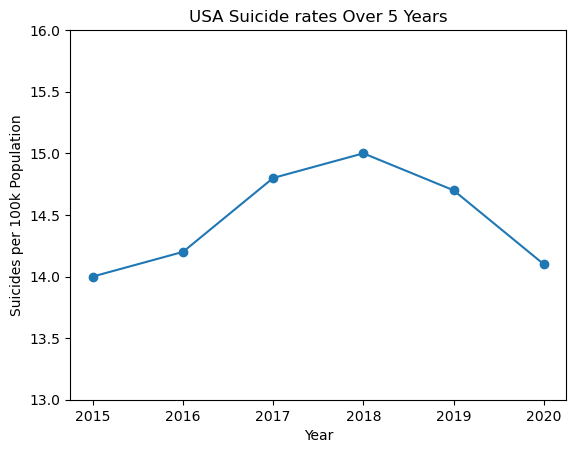

In [146]:
# Plot the data
plt.plot(usa_suicide_rates['Year'], usa_suicide_rates['Value'], marker='o', linestyle='-')

# Set y-axis limits and ticks
plt.ylim(13, 16)
#plt.yticks(range(55000, 80001, 5000))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.title('USA Suicide rates Over 5 Years')
plt.savefig('../Visuals/usa_suicide_rates.png')
# Show the plot
plt.show()

In [147]:
# Check the data types of columns in suicide_df
suicide_df_dtypes = suicide_df.dtypes
print(suicide_df_dtypes)


Country       object
Indicator     object
Subject       object
Measure       object
Year           int64
Value        float64
dtype: object


In [148]:
world_suicide_df = suicide_df[suicide_df['Country'] != 'USA']
world_suicide_df.reset_index(drop=True, inplace=True)
world_suicide_df.head()


,Country,Indicator,Subject,Measure,Year,Value
0,AUS,SUICIDE,TOT,100000PER,2015,13.2
1,AUS,SUICIDE,TOT,100000PER,2016,12.2
2,AUS,SUICIDE,TOT,100000PER,2017,13.6
3,AUS,SUICIDE,TOT,100000PER,2018,13.0
4,AUS,SUICIDE,TOT,100000PER,2019,13.5


In [149]:
# Check the data types of columns
print(world_suicide_df.dtypes)


Country       object
Indicator     object
Subject       object
Measure       object
Year           int64
Value        float64
dtype: object


In [150]:
# Group the DataFrame by the "Year" column and calculate the mean
world_suicide_avg = world_suicide_df[["Year","Value"]]
#average_by_year = suicide_df.groupby("Year").mean()

# Display the resulting DataFrame
#print(average_by_year)
world_suicide_avg


,Year,Value
0,2015,13.2
1,2016,12.2
2,2017,13.6
3,2018,13.0
4,2019,13.5
...,...,...
226,2015,10.9
227,2016,9.6
228,2017,9.4
229,2018,9.5


In [151]:
# Calculate the average suicide rate for all countries together by year
average_by_year_w = world_suicide_avg.groupby(["Year"]).mean()
average_by_year_w.reset_index(inplace=True)


# Display the resulting DataFrame
average_by_year_w.head()


,Year,Value
0,2015,11.390698
1,2016,10.669767
2,2017,10.735000
3,2018,10.507895
4,2019,10.494595


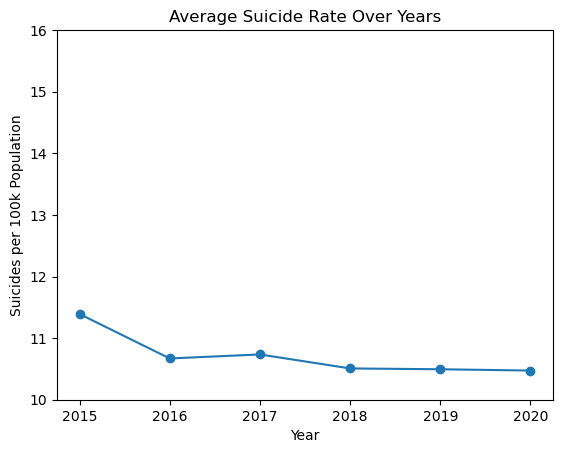

In [152]:

# Plot the data
plt.plot(average_by_year_w["Year"], average_by_year_w['Value'], marker='o', linestyle='-')

# Set y-axis limits and ticks
plt.ylim(10, 16)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.title('Average Suicide Rate Over Years')
plt.savefig('../Visuals/average_world_suicide_rate_comparison.png')
# Show the plot
plt.show()


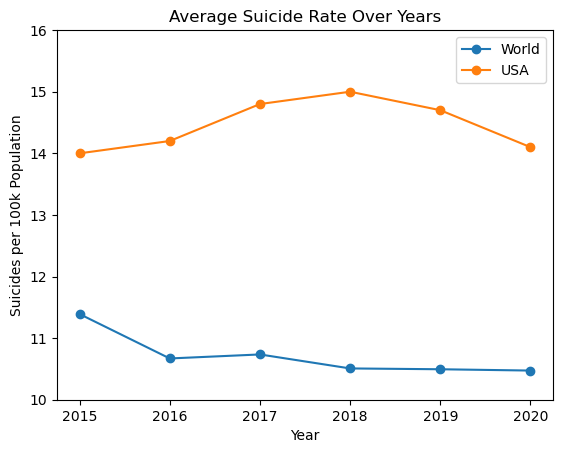

In [153]:

# Plot the data for average suicide rate
plt.plot(average_by_year_w["Year"], average_by_year_w['Value'], marker='o', linestyle='-', label='World')

# Plot the data for USA suicide rate
plt.plot(usa_suicide_rates['Year'], usa_suicide_rates['Value'], marker='o', linestyle='-', label='USA')

# Set y-axis limits and ticks
plt.ylim(10, 16)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.title('Average Suicide Rate Over Years')

# Add legend
plt.legend()
plt.savefig('../Visuals/suicide_rate_comparison.png')
# Show the plot
plt.show()



In [154]:
salarybyamount_df = salarybyamount_df.iloc[:, :-1]

# Alternatively, you can use the drop method
# df = df.drop(df.columns[-1], axis=1)

# Display the DataFrame after deleting the last column
filtered_df = salarybyamount_df[(salarybyamount_df['YEAR'] >= 2015) & (salarybyamount_df['YEAR'] <= 2020)]

print(filtered_df)

     YEAR STATE  RATE DEATHS
50   2020    AL  16.0    793
51   2020    AK  27.5    204
52   2020    AZ  17.6   1363
53   2020    AR  19.0    583
54   2020    CA  10.0   4144
..    ...   ...   ...    ...
345  2015    VA  12.7  1,118
346  2015    WA  15.4  1,137
347  2015    WV  17.4    340
348  2015    WI  14.7    877
349  2015    WY  28.0    157

[300 rows x 4 columns]


In [155]:
filtered_df = salarybyamount_df[(salarybyamount_df['YEAR'] >= 2015) & (salarybyamount_df['YEAR'] <= 2020)]
filtered_df


,YEAR,STATE,RATE,DEATHS
50,2020,AL,16.0,793
51,2020,AK,27.5,204
52,2020,AZ,17.6,1363
53,2020,AR,19.0,583
54,2020,CA,10.0,4144
...,...,...,...,...
345,2015,VA,12.7,"1,118"
346,2015,WA,15.4,"1,137"
347,2015,WV,17.4,340
348,2015,WI,14.7,877


In [156]:
print(filtered_df.info())
columns_to_convert1 = ["DEATHS"]
filtered_df[columns_to_convert1] = filtered_df[columns_to_convert1].apply(pd.to_numeric, errors='coerce')
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 50 to 349
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    300 non-null    int64  
 1   STATE   300 non-null    object 
 2   RATE    300 non-null    float64
 3   DEATHS  300 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 50 to 349
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    300 non-null    int64  
 1   STATE   300 non-null    object 
 2   RATE    300 non-null    float64
 3   DEATHS  250 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 11.7+ KB
None


In [157]:
salarybystate_df

,"Table with row headers in column A and column headers in rows 5 and 6, and 60 and 61",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74
0,Table H-8. Median Household Income by State: ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(Households as of March of the following year....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CURRENT DOLLARS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,State,2020,NaN,2019,NaN,2018,NaN,2017,NaN,2016,...,1988,NaN,1987 (21),NaN,1986,NaN,1985 (20),NaN,1984 (19),NaN
4,NaN,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,...,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Wisconsin,"62,629","2,039","65,029","2,979","64,998","3,763","62,593","1,931","58,745",...,"60,525","2,001","55,913","2,990","57,970","1,761","51,879","2,591","47,882","1,895"
111,Wyoming,"62,539","3,892","60,987","3,262","59,247","3,210","60,513","3,267","64,575",...,"54,066","2,241","58,502","3,092","51,673","1,893","49,279","2,341","54,976","1,687"
112,"Source: U.S. Bureau of the Census, Current Pop...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,Footnotes are available at <www.census.gov/top...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
salarybystate_df = salarybystate_df.iloc[6:111, :13]
salarybystate_df


,"Table with row headers in column A and column headers in rows 5 and 6, and 60 and 61",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
6,Alabama,"49,936","2,423","50,865","1,094","51,113",845,"47,221","2,301","44,509","3,419","42,278","1,529"
7,Alaska,"68,734","3,390","77,987","3,718","72,231","2,719","75,723","4,086","75,112","3,485","67,629","3,153"
8,Arizona,"62,283","2,291","59,700","2,689","61,125","2,642","57,100","1,971","52,248","2,008","49,254","2,304"
9,Arkansas,"49,781","2,108","49,751","2,491","48,829","2,642","45,907","2,165","42,798","1,572","44,922","2,546"
10,California,"70,489","1,233","70,038","1,576","69,759","1,452","66,637","1,075","63,636","1,711","60,487",894
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Vermont,"70,066","2,350","65,234","3,389","65,360","3,209","63,660","1,427","63,058","2,779","64,455","3,289"
107,Virginia,"77,151","3,086","72,537","3,898","73,031","3,356","69,535","2,549","65,169","2,585","70,239","3,128"
108,Washington,"79,726","3,025","73,284","2,176","77,256","3,388","73,573","2,189","71,271","3,448","62,714","2,330"
109,West Virginia,"50,573","1,337","48,102","1,308","46,499","1,521","46,412","2,087","45,389","3,320","41,993","2,330"


In [159]:
new_column_names = ['State', '2020 median', '2020 standard error', '2019 median', '2019 standard error','2018 median', '2018 standard error','2017 median', '2017 standard error','2016 median', '2016 standard error','2015 median', '2015 standard error',]

# Rename the columns
salarybystate_df.columns = new_column_names


In [160]:
salarybystate_df
salarybystate_df = salarybystate_df.reset_index(drop=True)
salarybystate_df

,State,2020 median,2020 standard error,2019 median,2019 standard error,2018 median,2018 standard error,2017 median,2017 standard error,2016 median,2016 standard error,2015 median,2015 standard error
0,Alabama,"49,936","2,423","50,865","1,094","51,113",845,"47,221","2,301","44,509","3,419","42,278","1,529"
1,Alaska,"68,734","3,390","77,987","3,718","72,231","2,719","75,723","4,086","75,112","3,485","67,629","3,153"
2,Arizona,"62,283","2,291","59,700","2,689","61,125","2,642","57,100","1,971","52,248","2,008","49,254","2,304"
3,Arkansas,"49,781","2,108","49,751","2,491","48,829","2,642","45,907","2,165","42,798","1,572","44,922","2,546"
4,California,"70,489","1,233","70,038","1,576","69,759","1,452","66,637","1,075","63,636","1,711","60,487",894
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Vermont,"70,066","2,350","65,234","3,389","65,360","3,209","63,660","1,427","63,058","2,779","64,455","3,289"
101,Virginia,"77,151","3,086","72,537","3,898","73,031","3,356","69,535","2,549","65,169","2,585","70,239","3,128"
102,Washington,"79,726","3,025","73,284","2,176","77,256","3,388","73,573","2,189","71,271","3,448","62,714","2,330"
103,West Virginia,"50,573","1,337","48,102","1,308","46,499","1,521","46,412","2,087","45,389","3,320","41,993","2,330"


In [161]:
newsalarybystate_df = salarybystate_df[["State", "2020 median", "2019 median", "2018 median", "2017 median", "2016 median", "2015 median"]]
newsalarybystate_df

,State,2020 median,2019 median,2018 median,2017 median,2016 median,2015 median
0,Alabama,"49,936","50,865","51,113","47,221","44,509","42,278"
1,Alaska,"68,734","77,987","72,231","75,723","75,112","67,629"
2,Arizona,"62,283","59,700","61,125","57,100","52,248","49,254"
3,Arkansas,"49,781","49,751","48,829","45,907","42,798","44,922"
4,California,"70,489","70,038","69,759","66,637","63,636","60,487"
...,...,...,...,...,...,...,...
100,Vermont,"70,066","65,234","65,360","63,660","63,058","64,455"
101,Virginia,"77,151","72,537","73,031","69,535","65,169","70,239"
102,Washington,"79,726","73,284","77,256","73,573","71,271","62,714"
103,West Virginia,"50,573","48,102","46,499","46,412","45,389","41,993"


In [162]:
print(newsalarybystate_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   State        104 non-null    object
 1   2020 median  104 non-null    object
 2   2019 median  104 non-null    object
 3   2018 median  104 non-null    object
 4   2017 median  104 non-null    object
 5   2016 median  104 non-null    object
 6   2015 median  104 non-null    object
dtypes: object(7)
memory usage: 5.9+ KB
None


In [163]:
# Convert selected columns to numeric data type
columns_to_convert = ["2020 median", "2019 median", "2018 median", "2017 median", "2016 median", "2015 median"]
newsalarybystate_df[columns_to_convert] = newsalarybystate_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')


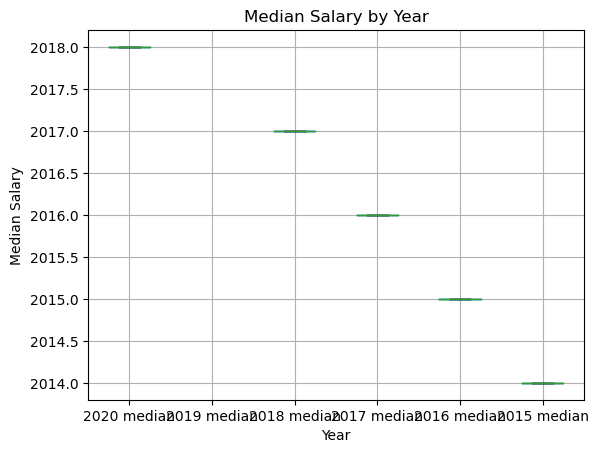

In [164]:
# Create a boxplot
newsalarybystate_df.boxplot(column=["2020 median", "2019 median", "2018 median", "2017 median", "2016 median", "2015 median"])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Median Salary')
plt.title('Median Salary by Year')

# Show the plot
plt.show()

KeyError: 'Column not found: Salary'

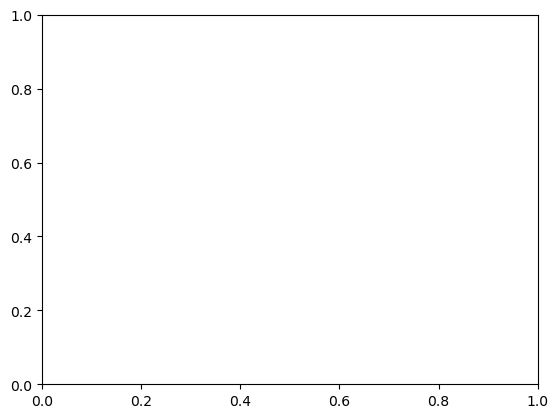

In [165]:
combined_df = pd.concat([newsalarybystate_df, filtered_df])
# Create a boxplot
combined_df.boxplot(column=['Salary'], by='State')

# Set plot labels and title
plt.xlabel('State')
plt.ylabel('Salary')
plt.title('Boxplot of Salary by State')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [166]:
Unemployment_data = Path("../Resources/NEw Filtered UNEMPR.csv")
Unemployment_data = pd.read_csv(Unemployment_data)
Unemployment_data

,STRUCTURE,STRUCTURE_ID,STRUCTURE_NAME,ACTION,REF_AREA,Reference area,MEASURE,Measure,UNIT_MEASURE,Unit of measure,...,TIME_PERIOD,Time period,OBS_VALUE,Observation value,OBS_STATUS,Observation status,UNIT_MULT,Unit multiplier,DECIMALS,Decimals
0,DATAFLOW,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),Labour force statistics indicators,I,USA,United States,UNE_RATE,Unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,1960,NaN,5.384126,NaN,A,Normal value,NaN,NaN,1,One
1,DATAFLOW,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),Labour force statistics indicators,I,USA,United States,UNE_RATE,Unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,1961,NaN,6.506720,NaN,A,Normal value,NaN,NaN,1,One
2,DATAFLOW,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),Labour force statistics indicators,I,USA,United States,UNE_RATE,Unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,1962,NaN,5.361554,NaN,A,Normal value,NaN,NaN,1,One
3,DATAFLOW,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),Labour force statistics indicators,I,USA,United States,UNE_RATE,Unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,1963,NaN,5.456398,NaN,A,Normal value,NaN,NaN,1,One
4,DATAFLOW,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),Labour force statistics indicators,I,USA,United States,UNE_RATE,Unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,1964,NaN,4.995648,NaN,A,Normal value,NaN,NaN,1,One
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,DATAFLOW,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),Labour force statistics indicators,I,USA,United States,UNE_RATE,Unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,2018,NaN,3.895703,NaN,A,Normal value,NaN,NaN,1,One
59,DATAFLOW,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),Labour force statistics indicators,I,USA,United States,UNE_RATE,Unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,2019,NaN,3.668283,NaN,A,Normal value,NaN,NaN,1,One
60,DATAFLOW,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),Labour force statistics indicators,I,USA,United States,UNE_RATE,Unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,2020,NaN,8.054572,NaN,A,Normal value,NaN,NaN,1,One
61,DATAFLOW,OECD.ELS.SAE:DSD_LFS@DF_LFS_INDIC(1.1),Labour force statistics indicators,I,USA,United States,UNE_RATE,Unemployment rate,PT_LF_SUB,Percentage of labour force in the same subgroup,...,2021,NaN,5.349189,NaN,A,Normal value,NaN,NaN,1,One


In [167]:
Unemployment_data.columns

Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'ACTION', 'REF_AREA',
       'Reference area', 'MEASURE', 'Measure', 'UNIT_MEASURE',
       'Unit of measure', 'SEX', 'Sex', 'AGE', 'Age', 'LABOUR_FORCE_STATUS',
       'Labour force status', 'TIME_PERIOD', 'Time period', 'OBS_VALUE',
       'Observation value', 'OBS_STATUS', 'Observation status', 'UNIT_MULT',
       'Unit multiplier', 'DECIMALS', 'Decimals'],
      dtype='object')

In [168]:
Unemployment_data.dtypes

STRUCTURE               object
STRUCTURE_ID            object
STRUCTURE_NAME          object
ACTION                  object
REF_AREA                object
Reference area          object
MEASURE                 object
Measure                 object
UNIT_MEASURE            object
Unit of measure         object
SEX                     object
Sex                     object
AGE                     object
Age                     object
LABOUR_FORCE_STATUS     object
Labour force status     object
TIME_PERIOD              int64
Time period            float64
OBS_VALUE              float64
Observation value      float64
OBS_STATUS              object
Observation status      object
UNIT_MULT              float64
Unit multiplier        float64
DECIMALS                 int64
Decimals                object
dtype: object

In [169]:
# List of columns to drop
columns_to_drop = ['STRUCTURE', 'STRUCTURE_ID', 
                   'STRUCTURE_NAME', 'ACTION', 
                   'REF_AREA', 'MEASURE', 
                   'UNIT_MEASURE', 'Time period', 
                   'Observation value', 'UNIT_MULT',
                   'Unit multiplier', 'Decimals']

# Drop the columns
Unemployment_data = Unemployment_data.drop(columns=columns_to_drop)

# Save the updated DataFrame to a new CSV file
Unemployment_data.to_csv('updated_UMPR.csv', index=False)

In [170]:
# List of columns to drop
columns_to_drop = ['SEX', 'AGE', 'LABOUR_FORCE_STATUS', 'OBS_STATUS']

# Drop the columns
Unemployment_data = Unemployment_data.drop(columns=columns_to_drop)

# Save the updated DataFrame to a new CSV file
Unemployment_data.to_csv('updated_UMPR.csv', index=False)

In [171]:
Unemployment_data

,Reference area,Measure,Unit of measure,Sex,Age,Labour force status,TIME_PERIOD,OBS_VALUE,Observation status,DECIMALS
0,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,1960,5.384126,Normal value,1
1,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,1961,6.506720,Normal value,1
2,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,1962,5.361554,Normal value,1
3,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,1963,5.456398,Normal value,1
4,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,1964,4.995648,Normal value,1
...,...,...,...,...,...,...,...,...,...,...
58,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,2018,3.895703,Normal value,1
59,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,2019,3.668283,Normal value,1
60,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,2020,8.054572,Normal value,1
61,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,2021,5.349189,Normal value,1


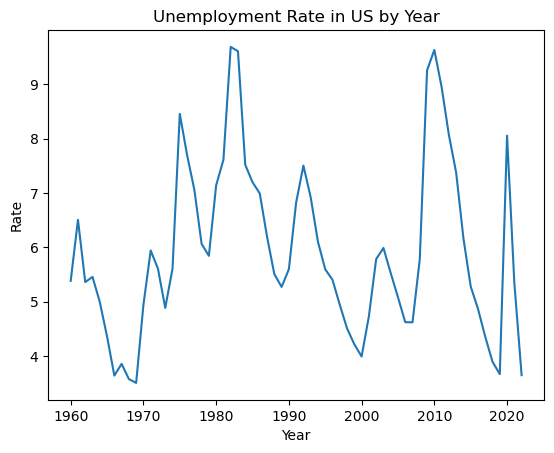

In [172]:
# 'TIME' and 'Value' are The Year and Unemployment rate values
plt.plot(Unemployment_data['TIME_PERIOD'], Unemployment_data['OBS_VALUE'])

plt.title('Unemployment Rate in US by Year')
plt.xlabel('Year')
plt.ylabel('Rate')

plt.show()

In [173]:
# Dictionary of old column names and new column names
column_names = {'TIME_PERIOD': 'TIME'}

# Rename the columns
Unemployment_data = Unemployment_data.rename(columns=column_names)

# Save the updated DataFrame to a new CSV file
Unemployment_data.to_csv('updated_UMPR.csv', index=False)

In [174]:
Suicide_Rates = Path("../Resources/Suicide Rates.csv")
Suicide_Rates = pd.read_csv(Suicide_Rates)
Suicide_Rates.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,SUICIDE,TOT,100000PER,A,1960,13.6,NaN
1,AUS,SUICIDE,TOT,100000PER,A,1961,15.0,NaN
2,AUS,SUICIDE,TOT,100000PER,A,1962,17.4,NaN
3,AUS,SUICIDE,TOT,100000PER,A,1963,19.8,NaN
4,AUS,SUICIDE,TOT,100000PER,A,1964,18.4,NaN


In [175]:
# Filter the DataFrame
Suicide_Rates = Suicide_Rates[Suicide_Rates['LOCATION'] == 'USA']

Suicide_Rates = Suicide_Rates[Suicide_Rates['SUBJECT'] == 'TOT']

# Save the filtered DataFrame to a new CSV file
Suicide_Rates.to_csv('filtered_Suicide_Rates.csv', index=False)

In [176]:
Suicide_Rates

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
1537,USA,SUICIDE,TOT,100000PER,A,1960,13.9,NaN
1538,USA,SUICIDE,TOT,100000PER,A,1961,13.6,NaN
1539,USA,SUICIDE,TOT,100000PER,A,1962,14.2,NaN
1540,USA,SUICIDE,TOT,100000PER,A,1963,14.3,NaN
1541,USA,SUICIDE,TOT,100000PER,A,1964,14.0,NaN
...,...,...,...,...,...,...,...,...
1593,USA,SUICIDE,TOT,100000PER,A,2016,14.2,NaN
1594,USA,SUICIDE,TOT,100000PER,A,2017,14.8,NaN
1595,USA,SUICIDE,TOT,100000PER,A,2018,15.0,NaN
1596,USA,SUICIDE,TOT,100000PER,A,2019,14.7,NaN


In [177]:
Suicide_Rates.dtypes

LOCATION       object
INDICATOR      object
SUBJECT        object
MEASURE        object
FREQUENCY      object
TIME            int64
Value         float64
Flag Codes     object
dtype: object

In [178]:
Suicide_Rates.columns

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value', 'Flag Codes'],
      dtype='object')

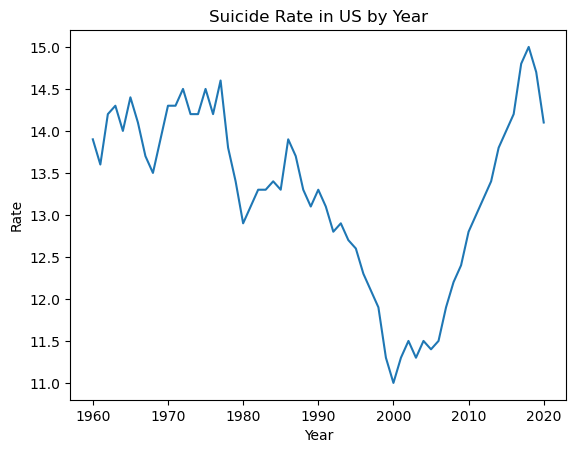

In [179]:
plt.plot(Suicide_Rates['TIME'], Suicide_Rates['Value'])

plt.title('Suicide Rate in US by Year')
plt.xlabel('Year')
plt.ylabel('Rate')

plt.show()

In [180]:
# Merge the DataFrames on the year column
merged_df = pd.merge(Unemployment_data, Suicide_Rates, on='TIME')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_UNEMPR_SR.csv', index=False)

In [181]:
UnEmp_SR = Path("merged_UNEMPR_SR.csv")
UnEmp_SR = pd.read_csv(UnEmp_SR)
UnEmp_SR.head()

,Reference area,Measure,Unit of measure,Sex,Age,Labour force status,TIME,OBS_VALUE,Observation status,DECIMALS,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes
0,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,1960,5.384126,Normal value,1,USA,SUICIDE,TOT,100000PER,A,13.9,NaN
1,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,1961,6.506720,Normal value,1,USA,SUICIDE,TOT,100000PER,A,13.6,NaN
2,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,1962,5.361554,Normal value,1,USA,SUICIDE,TOT,100000PER,A,14.2,NaN
3,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,1963,5.456398,Normal value,1,USA,SUICIDE,TOT,100000PER,A,14.3,NaN
4,United States,Unemployment rate,Percentage of labour force in the same subgroup,Total,Total,Unemployment,1964,4.995648,Normal value,1,USA,SUICIDE,TOT,100000PER,A,14.0,NaN


In [182]:
# List of columns to drop
columns_to_drop = ['Flag Codes', 'DECIMALS', 'Sex', 'Age', 'Observation status', 'SUBJECT', 'FREQUENCY']

# Drop the columns
UnEmp_SR = UnEmp_SR.drop(columns=columns_to_drop)

# Save the updated DataFrame to a new CSV file
UnEmp_SR.to_csv('merged_UNEMPR_SR.csv', index=False)

In [183]:
UnEmp_SR

,Reference area,Measure,Unit of measure,Labour force status,TIME,OBS_VALUE,LOCATION,INDICATOR,MEASURE,Value
0,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,1960,5.384126,USA,SUICIDE,100000PER,13.9
1,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,1961,6.506720,USA,SUICIDE,100000PER,13.6
2,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,1962,5.361554,USA,SUICIDE,100000PER,14.2
3,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,1963,5.456398,USA,SUICIDE,100000PER,14.3
4,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,1964,4.995648,USA,SUICIDE,100000PER,14.0
...,...,...,...,...,...,...,...,...,...,...
56,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,2016,4.870250,USA,SUICIDE,100000PER,14.2
57,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,2017,4.356233,USA,SUICIDE,100000PER,14.8
58,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,2018,3.895703,USA,SUICIDE,100000PER,15.0
59,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,2019,3.668283,USA,SUICIDE,100000PER,14.7


In [184]:
# Dictionary of old column names and new column names
column_names = {'OBS_VALUE': 'Unemployment Rate', 'Value': 'Suicide Rate'}

# Rename the columns
UnEmp_SR = UnEmp_SR.rename(columns=column_names)

# Save the updated DataFrame to a new CSV file
UnEmp_SR.to_csv('merged_UNEMPR_SR.csv', index=False)

In [185]:
UnEmp_SR.head()

,Reference area,Measure,Unit of measure,Labour force status,TIME,Unemployment Rate,LOCATION,INDICATOR,MEASURE,Suicide Rate
0,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,1960,5.384126,USA,SUICIDE,100000PER,13.9
1,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,1961,6.506720,USA,SUICIDE,100000PER,13.6
2,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,1962,5.361554,USA,SUICIDE,100000PER,14.2
3,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,1963,5.456398,USA,SUICIDE,100000PER,14.3
4,United States,Unemployment rate,Percentage of labour force in the same subgroup,Unemployment,1964,4.995648,USA,SUICIDE,100000PER,14.0


Pearson correlation coefficient: 0.009638250375919932


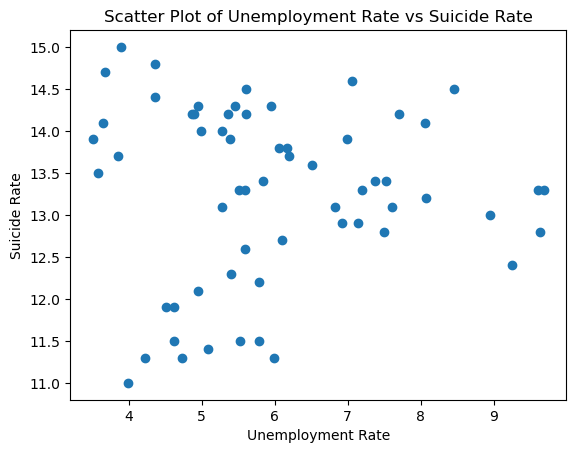

In [186]:
plt.scatter(UnEmp_SR['Unemployment Rate'], UnEmp_SR['Suicide Rate'])

plt.title('Scatter Plot of Unemployment Rate vs Suicide Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Suicide Rate')

# Assuming 'column1' and 'column2' are columns in your DataFrame
correlation = UnEmp_SR['Unemployment Rate'].corr(UnEmp_SR['Suicide Rate'])

print("Pearson correlation coefficient:", correlation)

plt.show()

In [187]:
# Dictionary of old column names and new column names
column_names = {'TIME': 'Year'}

# Rename the columns
UnEmp_SR = UnEmp_SR.rename(columns=column_names)

# Save the updated DataFrame to a new CSV file
UnEmp_SR.to_csv('merged_UNEMPR_SR.csv', index=False)

In [188]:
UnEmp_SR = UnEmp_SR[(UnEmp_SR['Year'] >= 2015) & (UnEmp_SR['Year'] <= 2020)] 

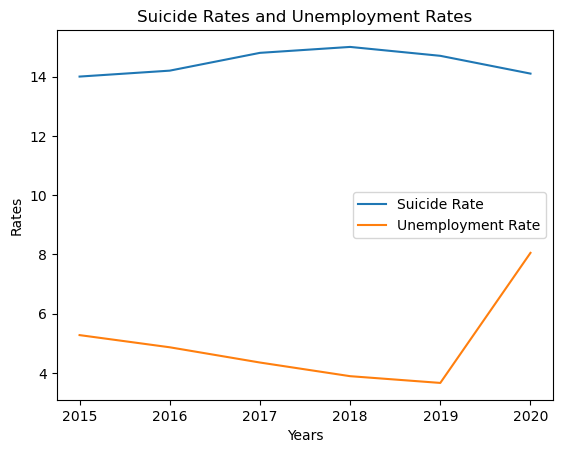

In [189]:
plt.plot(UnEmp_SR['Year'], UnEmp_SR['Suicide Rate'], label='Suicide Rate') 
plt.plot(UnEmp_SR['Year'], UnEmp_SR['Unemployment Rate'], label='Unemployment Rate') 

plt.xlabel('Years')
plt.ylabel('Rates')
plt.title('Suicide Rates and Unemployment Rates')

plt.legend()
plt.show()

The r-squared is: 0.48481041009454284


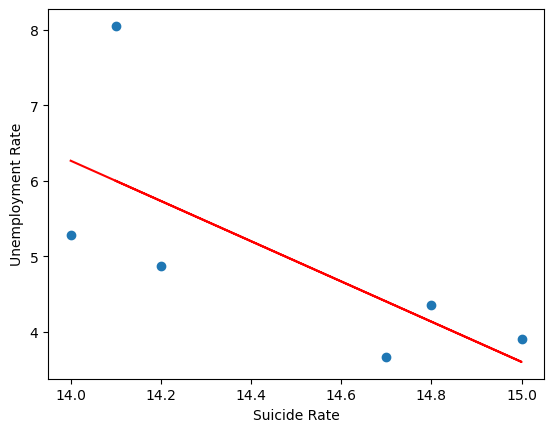

In [190]:
x_values = UnEmp_SR['Suicide Rate']
y_values = UnEmp_SR['Unemployment Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Suicide Rate')
plt.ylabel('Unemployment Rate')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [191]:
data = UnEmp_SR['Suicide Rate']  

# Step 4: Use the normaltest function to check for normality
k2, p = normaltest(data)

# Step 5: Print the result
print("p = {:g}".format(p))

alpha = 0.05
if p < alpha:  # null hypothesis: data comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

ValueError: skewtest is not valid with less than 8 samples; 6 samples were given.

In [192]:
Q1 = UnEmp_SR['Suicide Rate'].quantile(0.25)
Q3 = UnEmp_SR['Suicide Rate'].quantile(0.75)
IQR = Q3 - Q1

filter = (UnEmp_SR['Suicide Rate'] >= Q1 - 1.5 * IQR) & (UnEmp_SR['Suicide Rate'] <= Q3 + 1.5 *IQR)
UnEmp_SR_no_outlier = UnEmp_SR.loc[filter]  

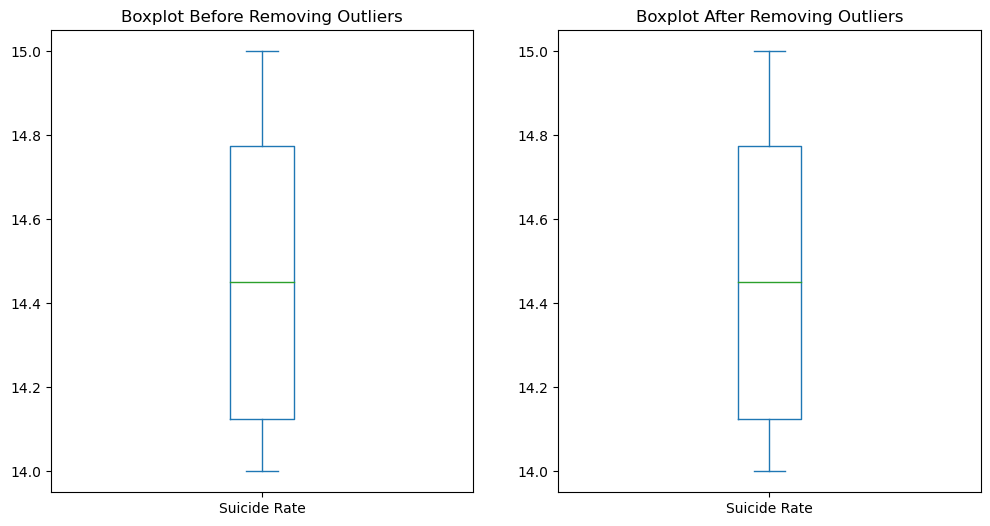

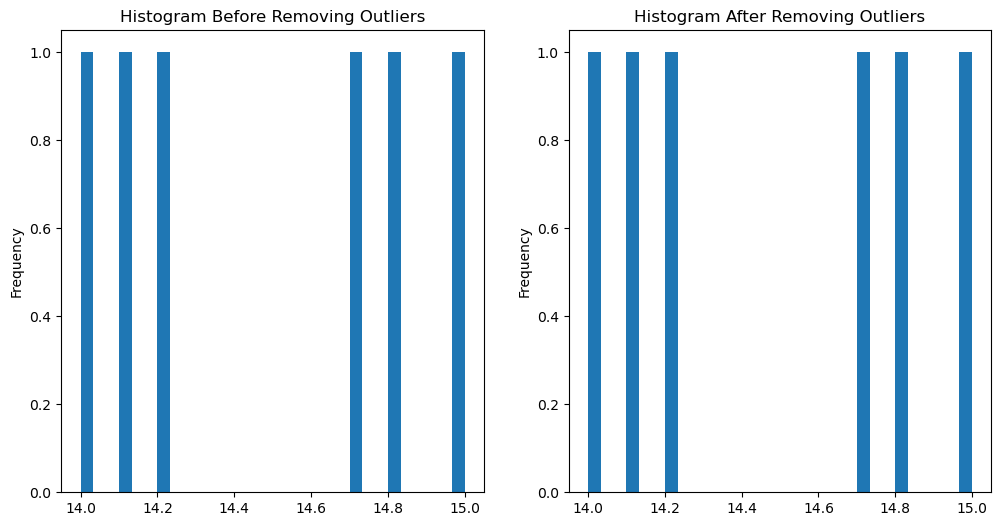

In [193]:
# Boxplot before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(121)
UnEmp_SR['Suicide Rate'].plot(kind='box')
plt.title('Boxplot Before Removing Outliers')

# Boxplot after removing outliers
plt.subplot(122)
UnEmp_SR_no_outlier['Suicide Rate'].plot(kind='box')
plt.title('Boxplot After Removing Outliers')

plt.show()

# Histogram before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(121)
UnEmp_SR['Suicide Rate'].plot(kind='hist', bins=30)
plt.title('Histogram Before Removing Outliers')

# Histogram after removing outliers
plt.subplot(122)
UnEmp_SR_no_outlier['Suicide Rate'].plot(kind='hist', bins=30)
plt.title('Histogram After Removing Outliers')

plt.show()

In [194]:
data = UnEmp_SR['Unemployment Rate']  

# Step 4: Use the normaltest function to check for normality
k2, p = normaltest(data)

# Step 5: Print the result
print("p = {:g}".format(p))

alpha = 0.05
if p < alpha:  # null hypothesis: data comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

ValueError: skewtest is not valid with less than 8 samples; 6 samples were given.

In [195]:
# Create a contingency table
contingency_table = pd.crosstab(UnEmp_SR['Unemployment Rate'], UnEmp_SR['Suicide Rate'])

# Perform the Chi-Squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print(f"Chi2 value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

Chi2 value: 30.000000000000007
P-value: 0.22428900483440348
Degrees of freedom: 25
